<h2 align="center">РК№1 ТМО</h2>

Зудин А.М.<br>
ИУ5-63Б<br>
Вариант№10<br>
Задание:<br>
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Загрузим выданный нам датасет
data = pd.read_csv("./dc-wikia-data.csv", sep=",")

Посмотрим тип наших данных

In [8]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

Теперь посмотрим в каких атрибутах у нас есть пропуски и сколько их

In [9]:
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [25]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 2013, 29.19%.
Колонка ALIGN. Тип данных object. Количество пустых значений 601, 8.72%.
Колонка EYE. Тип данных object. Количество пустых значений 3628, 52.61%.
Колонка HAIR. Тип данных object. Количество пустых значений 2274, 32.98%.
Колонка SEX. Тип данных object. Количество пустых значений 125, 1.81%.
Колонка GSM. Тип данных object. Количество пустых значений 6832, 99.07%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.04%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 69, 1.0%.


Возьмем количественный признак year и обработаем его пропуски, обрабатывать будем<br> с помощью модуля sklearn.<br>
подключим его:

In [20]:
from sklearn.impute import SimpleImputer

Но сначала нам следует изучить выбранный количественный признак

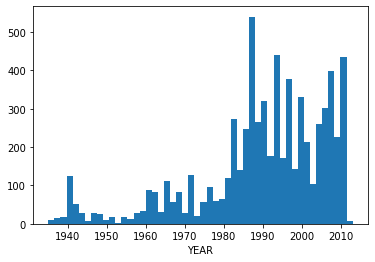

In [15]:
plt.hist(data['YEAR'], 50)
plt.xlabel('YEAR')
plt.show()

Распределение не одномодальное поэтому будем заполнять пропуски данных по среднему значению

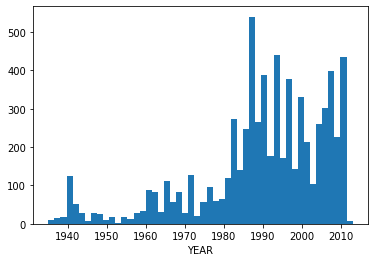

In [23]:
med_imp = SimpleImputer(strategy="mean")
med_rat = med_imp.fit_transform(data[['YEAR']])
plt.hist(med_rat, 50)
plt.xlabel('YEAR')
plt.show()

Таким образом мы заполнили данные при этом не изменив статистику<br>
Теперь обработаем количесвенный признак Alive

In [27]:
cat_cols = []
col="ALIVE"
# Количество пустых значений 
temp_null_count = data[data[col].isnull()].shape[0]
dt = str(data[col].dtype)
if temp_null_count>0 and (dt=='object'):
    cat_cols.append(col)
    temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
    print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.04%.


Количество пропущенных данных мало поэтому мы можем заполнить данные наиболее встречающимися 

In [37]:
cat_temp_data = data[["ALIVE"]]
pd.unique(data["ALIVE"])

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [38]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Living Characters'],
       ['Living Characters'],
       ['Living Characters'],
       ...,
       ['Living Characters'],
       ['Living Characters'],
       ['Living Characters']], dtype=object)

Ответы на вопросы к рк:<br>
В данной работе для обработки пропусков данных я воспользовался двумя стратегиями: 1) Заполнение пропусков числовых данных, с помощью средних значений; 2) заполнение данных в признаке, в котором количество пропусков не превышает порогового значения (5%), путем заполнения наиболее часто встречаемым значением. Я считаю для построения моделей следует использовать следующие призанки: SEX, ALIGN, ALIVE.
